In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load mnist data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Adjusting to 0 ~ 1.0
x_train = x_train / 255.0
x_test = x_test / 255.0

print(x_train.shape, x_test.shape)

# (60000, 28, 28) (10000, 28, 28)
# 28x28 매트릭스가 60000개 /10000개 저장

(60000, 28, 28) (10000, 28, 28)


In [2]:
# CNN Input 형태로 변환
# 흑백 1채널 

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print(x_train.shape, x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [4]:
# Dense Input 
# Keras functional API 아키텍처 확인을 목적으로 
# 임의의(동일한 데이터) 입력 데이터를 준비

x_train_dense = x_train.reshape(-1, 28, 28)
x_test_dense = x_test.reshape(-1, 28, 28)

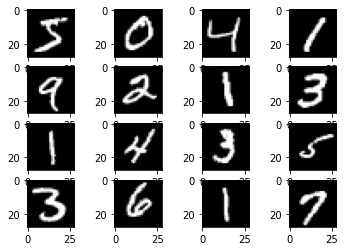

In [6]:
# Plotting - 데이터 확인
plt.figure()
for c in range(16):
    plt.subplot(4,4,c+1)
    plt.imshow(x_train[c].reshape(28,28), cmap='gray')
plt.show()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 26, 26, 16)   160         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 13, 13, 16)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 28, 28)]     0                                            
______________________________________________________________________________________________

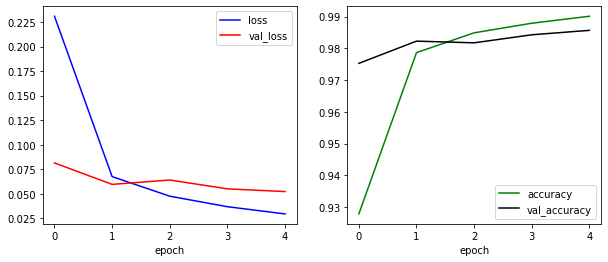

0.03926900774240494 0.9876000285148621


In [9]:
# CNN Model 
Input_shape = (28,28,1)
img_input = tf.keras.layers.Input(shape=Input_shape)
h = tf.keras.layers.Conv2D(kernel_size=(3,3), filters=16, activation='relu')(img_input)
h = tf.keras.layers.MaxPooling2D((2,2))(h)
h = tf.keras.layers.Conv2D(kernel_size=(3,3), filters=32, activation='relu')(h)
h = tf.keras.layers.MaxPooling2D((2,2))(h)
h = tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, activation='relu')(h)
h = tf.keras.layers.Flatten()(h)
img_out = tf.keras.layers.Dense(32, activation='relu')(h)

# Dense Model
Input_shape_dense = (28,28)
img_input_dense = tf.keras.layers.Input(shape=Input_shape_dense)
hh = tf.keras.layers.Flatten()(img_input_dense)
hh = tf.keras.layers.Dense(64, activation='relu')(hh)
hh = tf.keras.layers.Dropout(0.2)(hh)
hh = tf.keras.layers.Dense(64, activation='relu')(hh)
img_out_dense = tf.keras.layers.Dropout(0.2)(hh)

# 모델 결합
concatenated = tf.keras.layers.concatenate([img_out, img_out_dense])
predictions = tf.keras.layers.Dense(10, activation='softmax')(concatenated)

# API model 정의
model = tf.keras.Model(inputs=[img_input, img_input_dense], outputs=predictions)
model.summary()

# Compile and Train
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit([x_train, x_train_dense], y_train, epochs=5, validation_split=0.25, verbose=2)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r-', label='val_loss')
plt.xlabel('epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k-', label='val_accuracy')
plt.xlabel('epoch')
plt.legend()

plt.show()

# Model evaluate
test_loss, test_acc = model.evaluate([x_test, x_test_dense], y_test, verbose=0)

print(test_loss, test_acc)


In [10]:
model.save('model.h5')